In [5]:
import os
import dotenv
import requests
import pandas as pd
import matplotlib.pyplot as plt
from src import plotting


series_id = 'MORTGAGE30US'

url = os.getenv("FRED_HOST_URL")
params = {
    'file_type': 'json',
    'api_key': os.getenv('FRED_API_KEY'),
    'series_id': series_id,
}
response = requests.get(url + "/fred/series/observations", params=params, timeout=5)

In [25]:
data = response.json()['observations']

df = pd.DataFrame(data, columns=['date', 'value'])

df['date'] = pd.to_datetime(df['date'])
df['value'] = pd.to_numeric(df['value'])
df.set_index('date', inplace=True)

df

,value
date,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2024-02-22,6.90
2024-02-29,6.94
2024-03-07,6.88


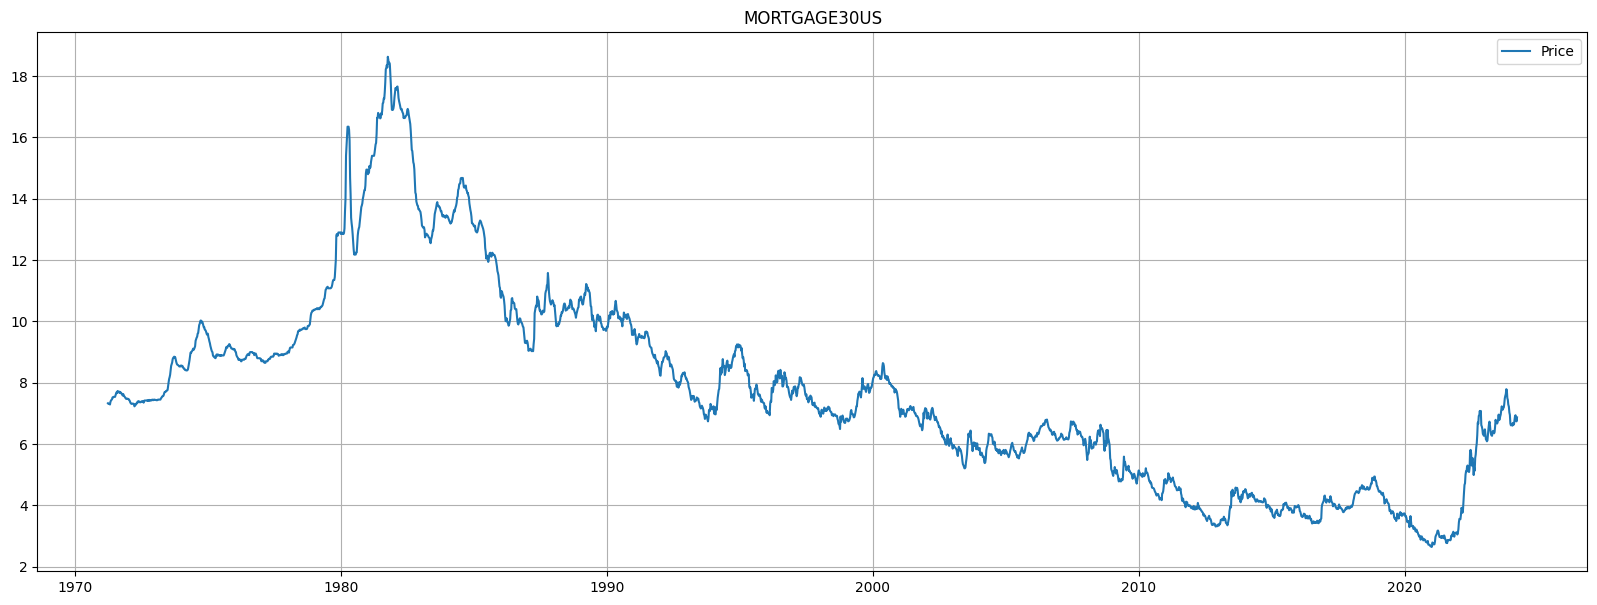

In [28]:
plt.figure(1, figsize=(20, 7))
plt.title(series_id)
plt.plot(df.index, df['value'], label="Price")
plt.legend()
plt.grid(True)
plt.show()